In [ ]:
import pandas as pd

# Load data from CSV
data = pd.read_csv('Mall_Customers.csv')
print(data.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
# Identify missing values
missing = data.isnull().sum()
print(missing)

# Drop or impute (let's assume there aren't any for this dataset)


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# One-hot encode 'Gender'
data = pd.get_dummies(data, columns=['Genre'], drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


<ipython-input-6-b2a09093a6bb>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


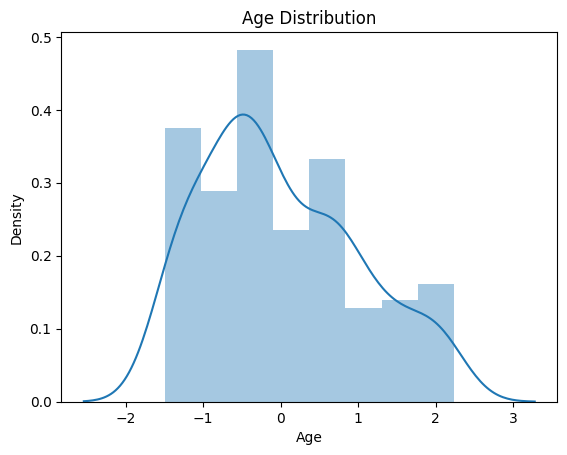

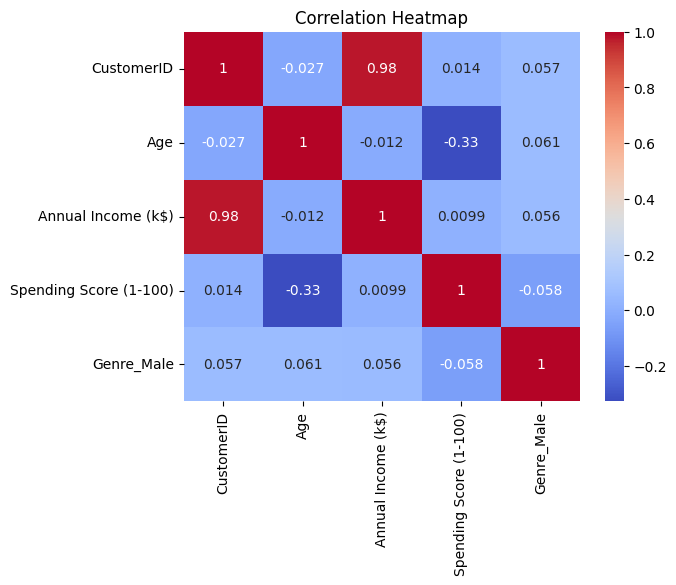

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Age
sns.distplot(data['Age'])
plt.title('Age Distribution')
plt.show()

# Correlation heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

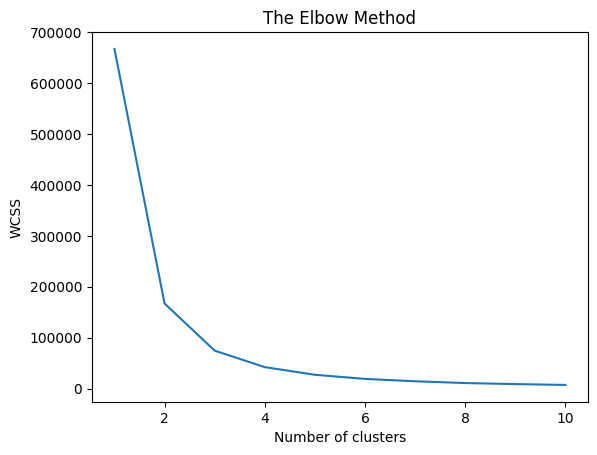

In [ ]:
from sklearn.cluster import KMeans

# Using the elbow method to find optimal number of clusters
wcss = [] # within-cluster sums of squares
for i in range(1, 11):  # let's check for up to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Assuming optimal clusters = 5 (for example)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data)
data['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Average values per feature for each cluster
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


         CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                     
0             180.0 -0.115264            1.406720                0.050941   
1              99.5  0.242213           -0.008970               -0.059203   
2              20.5 -0.301420           -1.378298               -0.035910   
3             139.5 -0.208123            0.510134                0.001941   
4              60.0  0.395361           -0.579236                0.042007   

         Genre_Male  
Cluster              
0          0.463415  
1          0.425000  
2          0.400000  
3          0.500000  
4          0.410256  


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
score = silhouette_score(data, kmeans.labels_)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.5450441697770794


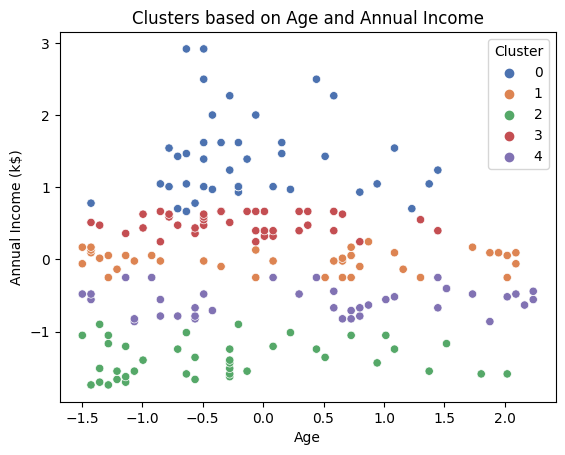

In [ ]:
# 2D scatter plot of Age vs. Annual Income colored by Cluster
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=data, palette="deep")
plt.title('Clusters based on Age and Annual Income')
plt.show()
